In [34]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font', **{'family': 'serif', 'serif': ['Cambria', 'Times New Roman']})

import seaborn as sns

In [2]:
pd.options.display.max_rows = 10

In [3]:
h5_dir = 'C:\\Users\\user\\Documents\\Agent-Based Models\\h5 files\\mmabmTests\\'
h5_file = 'abmga_%d_2.h5' % 51
h5in = '%s%s' % (h5_dir, h5_file)

## Tables
### Exchange: trades, orders, tob
### MarketMakerL: oi_signal_3000,  of_signal_3000, mmp
### Runner: qtl

In [14]:
of_df = pd.read_hdf(h5in, 'of_signal_3000')
of_df

,OFAcc,OFCond,OFStr,OFStrat,OFV,Step
0,0.000000,2222222222222222,0000000000000000,0,0,21
1,15.680000,2222222222222222,0000000000000000,28,0,21
2,12.500000,2222222222222222,0000000000000000,25,0,21
3,0.720000,2222222222222222,0000000000000000,6,0,21
4,0.000000,2202222222222222,0000000000000000,0,0,21
...,...,...,...,...,...,...
260055,0.638665,2202222220022022,0000000000000000,1,0,249996
260056,0.705891,2202222220022022,1110000011100000,1,3,249997
260057,0.155632,1210222212222222,1110000000000000,0,0,249998
260058,0.214909,2122222202222222,1110000000000000,0,0,249999


### Order Flow

In [15]:
mof_df = of_df.groupby('Step').OFAcc.mean()
mof_df

Step
21        5.934000
22        0.000000
23        0.000000
24        0.000000
25        0.020000
            ...   
249996    0.638665
249997    0.705891
249998    0.155632
249999    0.214909
250000    0.210610
Name: OFAcc, Length: 249980, dtype: float64

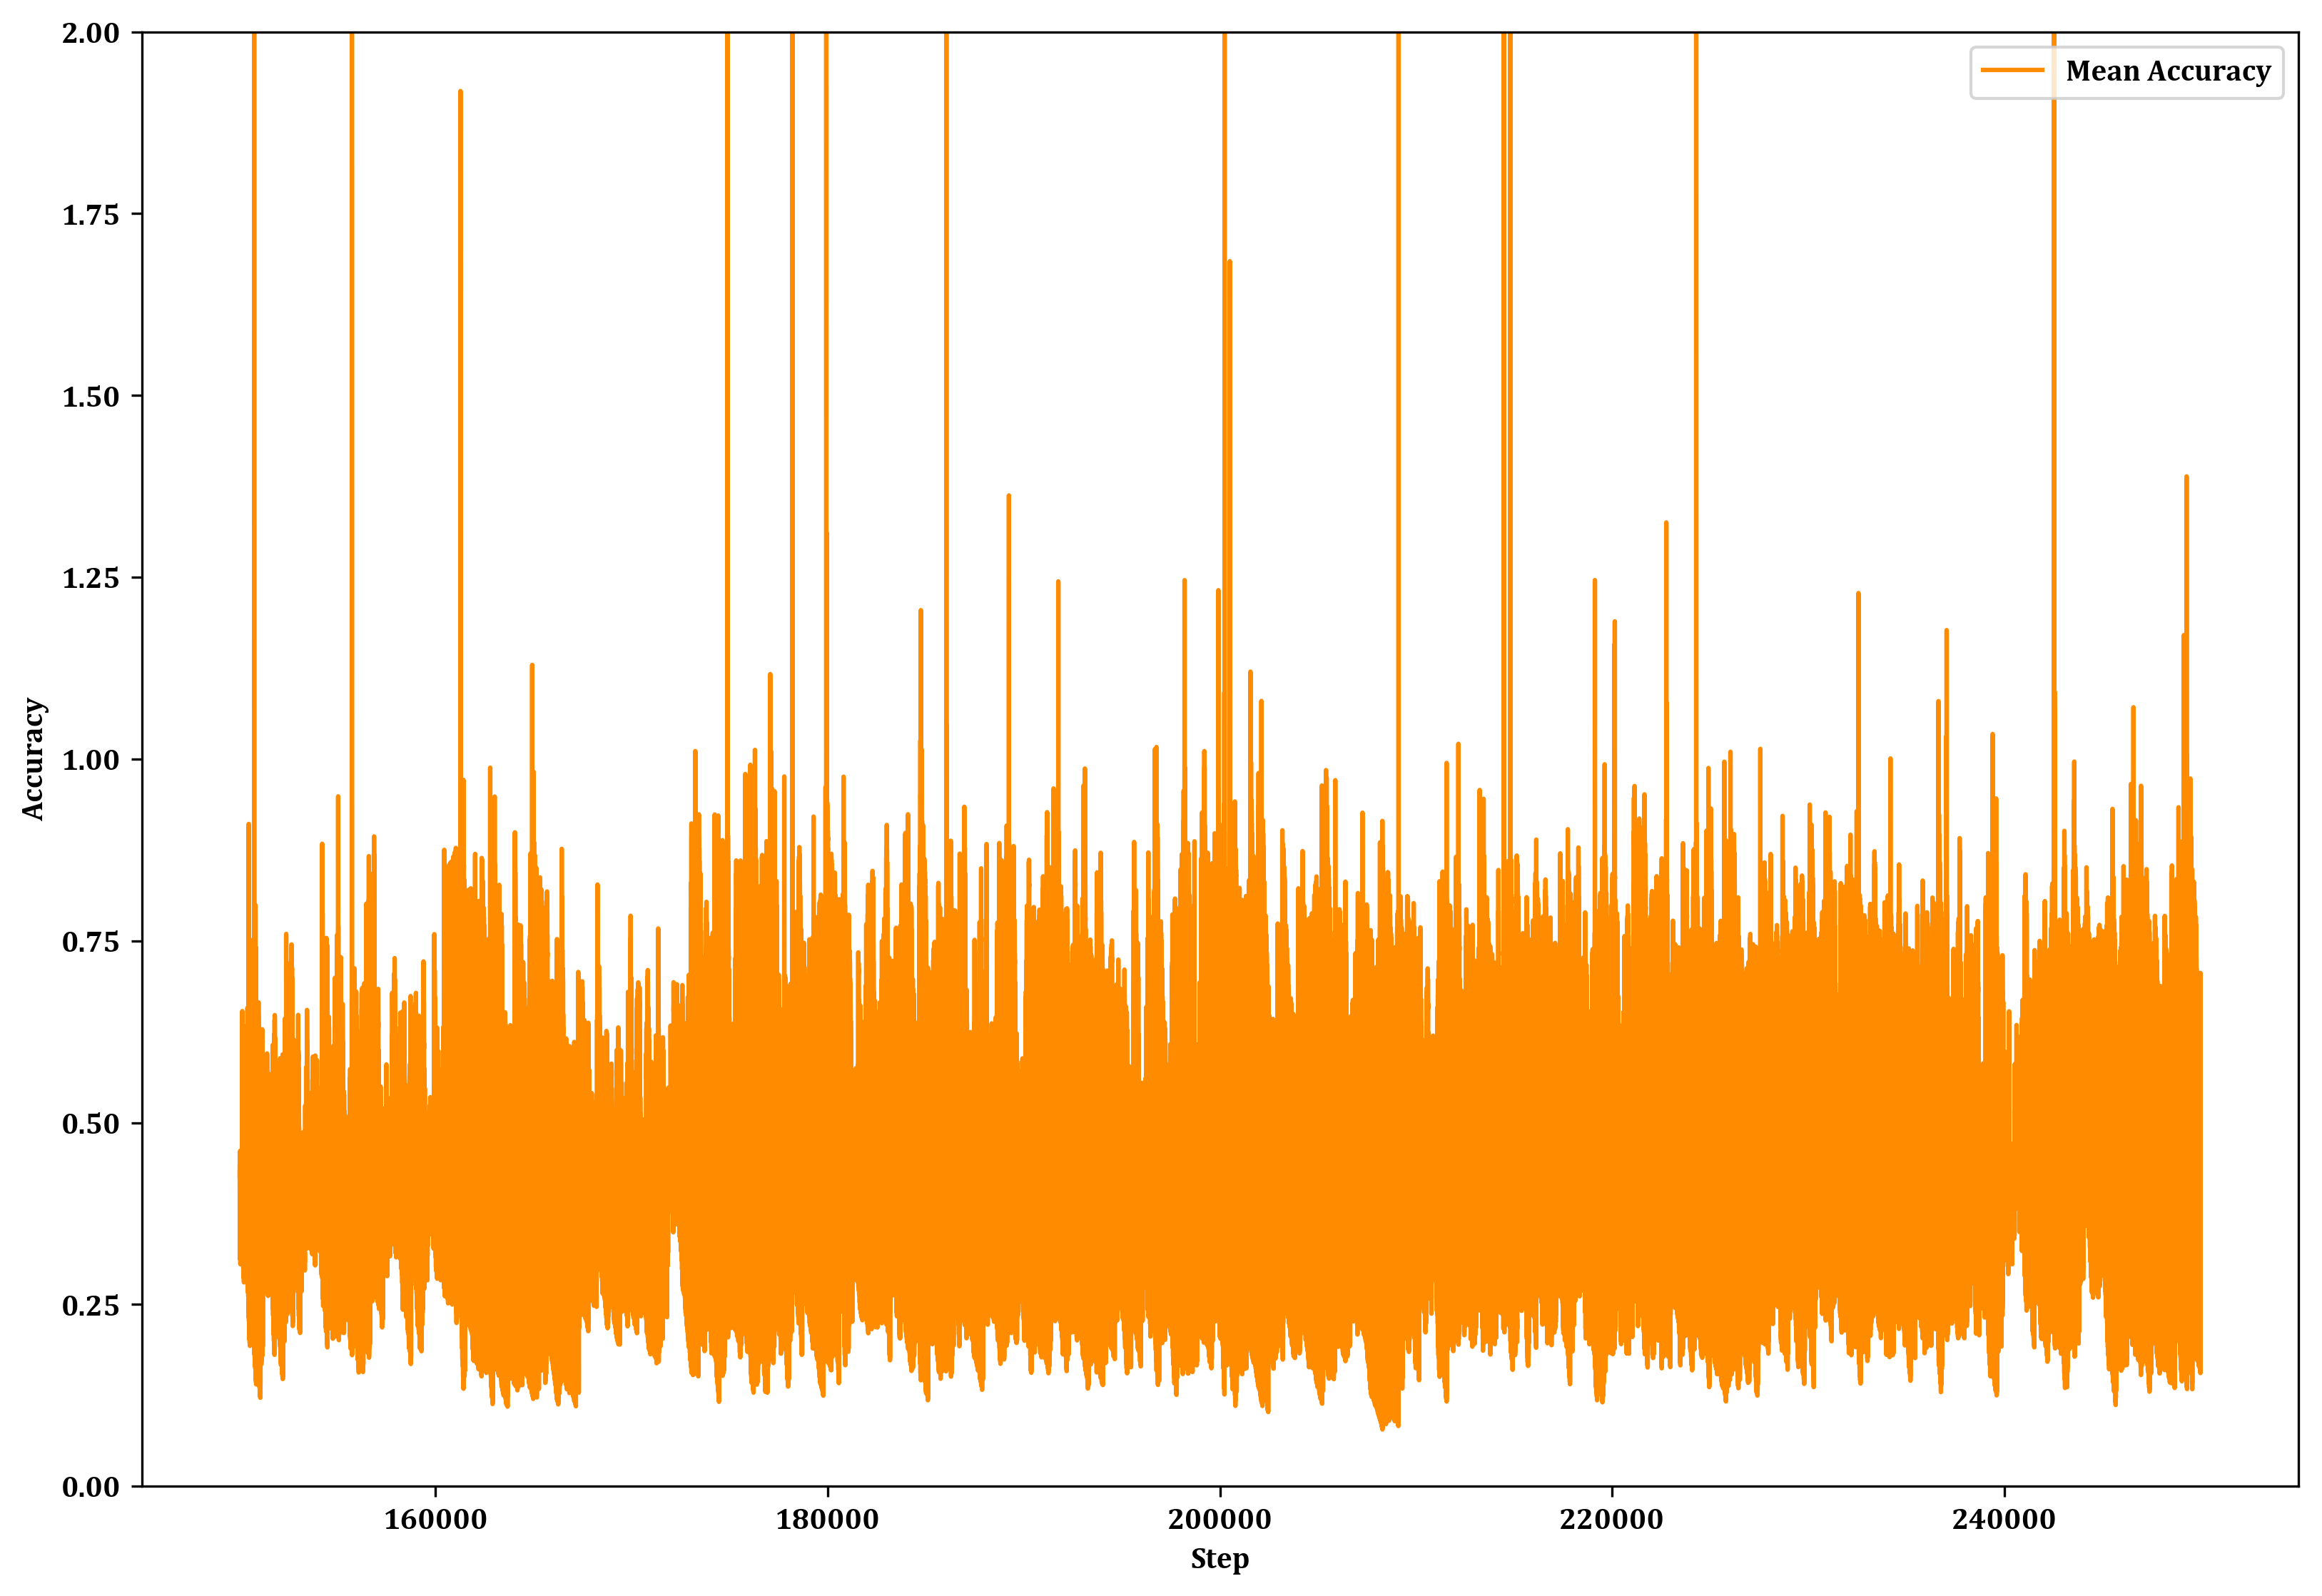

In [16]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(mof_df[150000:], linestyle='solid', color='DarkOrange', marker='None', label='Mean Accuracy')
ax1.set_ylim([0, 2])
ax1.set_xlabel('Step', family='Cambria')
ax1.set_ylabel('Accuracy', family='Cambria')
ax1.legend(loc='upper right')
plt.show()

In [21]:
tof_df = of_df.groupby('OFCond').OFStrat.count()
tof_df.sort_values()[-10:]

OFCond
1210222212222222      3682
2222222222220222      4221
2222202222222222      5947
2202222222222222      7076
2122202222222222     12401
2122222202222222     13726
2212222222222222     17228
2222222222222220     21128
2222222210202222     37110
2222222222222222    103632
Name: OFStrat, dtype: int64

In [47]:
mof2_df = of_df.groupby('Step')['OFStrat', 'OFV'].mean()
mof2_df = mof2_df.assign(NailedIt = mof2_df.OFStrat == mof2_df.OFV,
                         Zed = mof2_df.OFV == 0)
mof2_df.groupby(['Zed', 'NailedIt']).OFV.count()

Zed    NailedIt
False  False        58805
       True          6679
True   False        16868
       True        167628
Name: OFV, dtype: int64

### Order Imbalance

In [40]:
oi_df = pd.read_hdf(h5in, 'oi_signal_3000')
oi_df

,OIAcc,OICond,OIStr,OIStrat,OIV,Step
0,0.000000,222222222222222222222222,000001100000000001100000,0,0,21
1,15.680000,222222222022222222222222,000001100000000001100000,28,0,21
2,0.320000,222222222222222222222222,000001100000000001100000,4,0,21
3,0.080000,222222222222222222222222,000001100000000001100000,-2,0,21
4,18.000000,222221222222022222222202,000001100000000001100000,-30,0,21
...,...,...,...,...,...,...
250087,0.255225,222222220222202222222220,000001100000000001100000,0,0,249996
250088,0.270120,222222220222202222222220,000000100000000000110000,0,1,249997
250089,0.264718,222222220222202222222220,000000100000000001100000,0,0,249998
250090,0.259424,222222220222202222222220,000000100000000001100000,0,0,249999


In [41]:
moi_df = oi_df.groupby('Step').OIAcc.mean()
moi_df

Step
21        6.643077
22        0.000000
23        0.000000
24        0.000000
25        0.020000
            ...   
249996    0.255225
249997    0.270120
249998    0.264718
249999    0.259424
250000    0.254235
Name: OIAcc, Length: 249980, dtype: float64

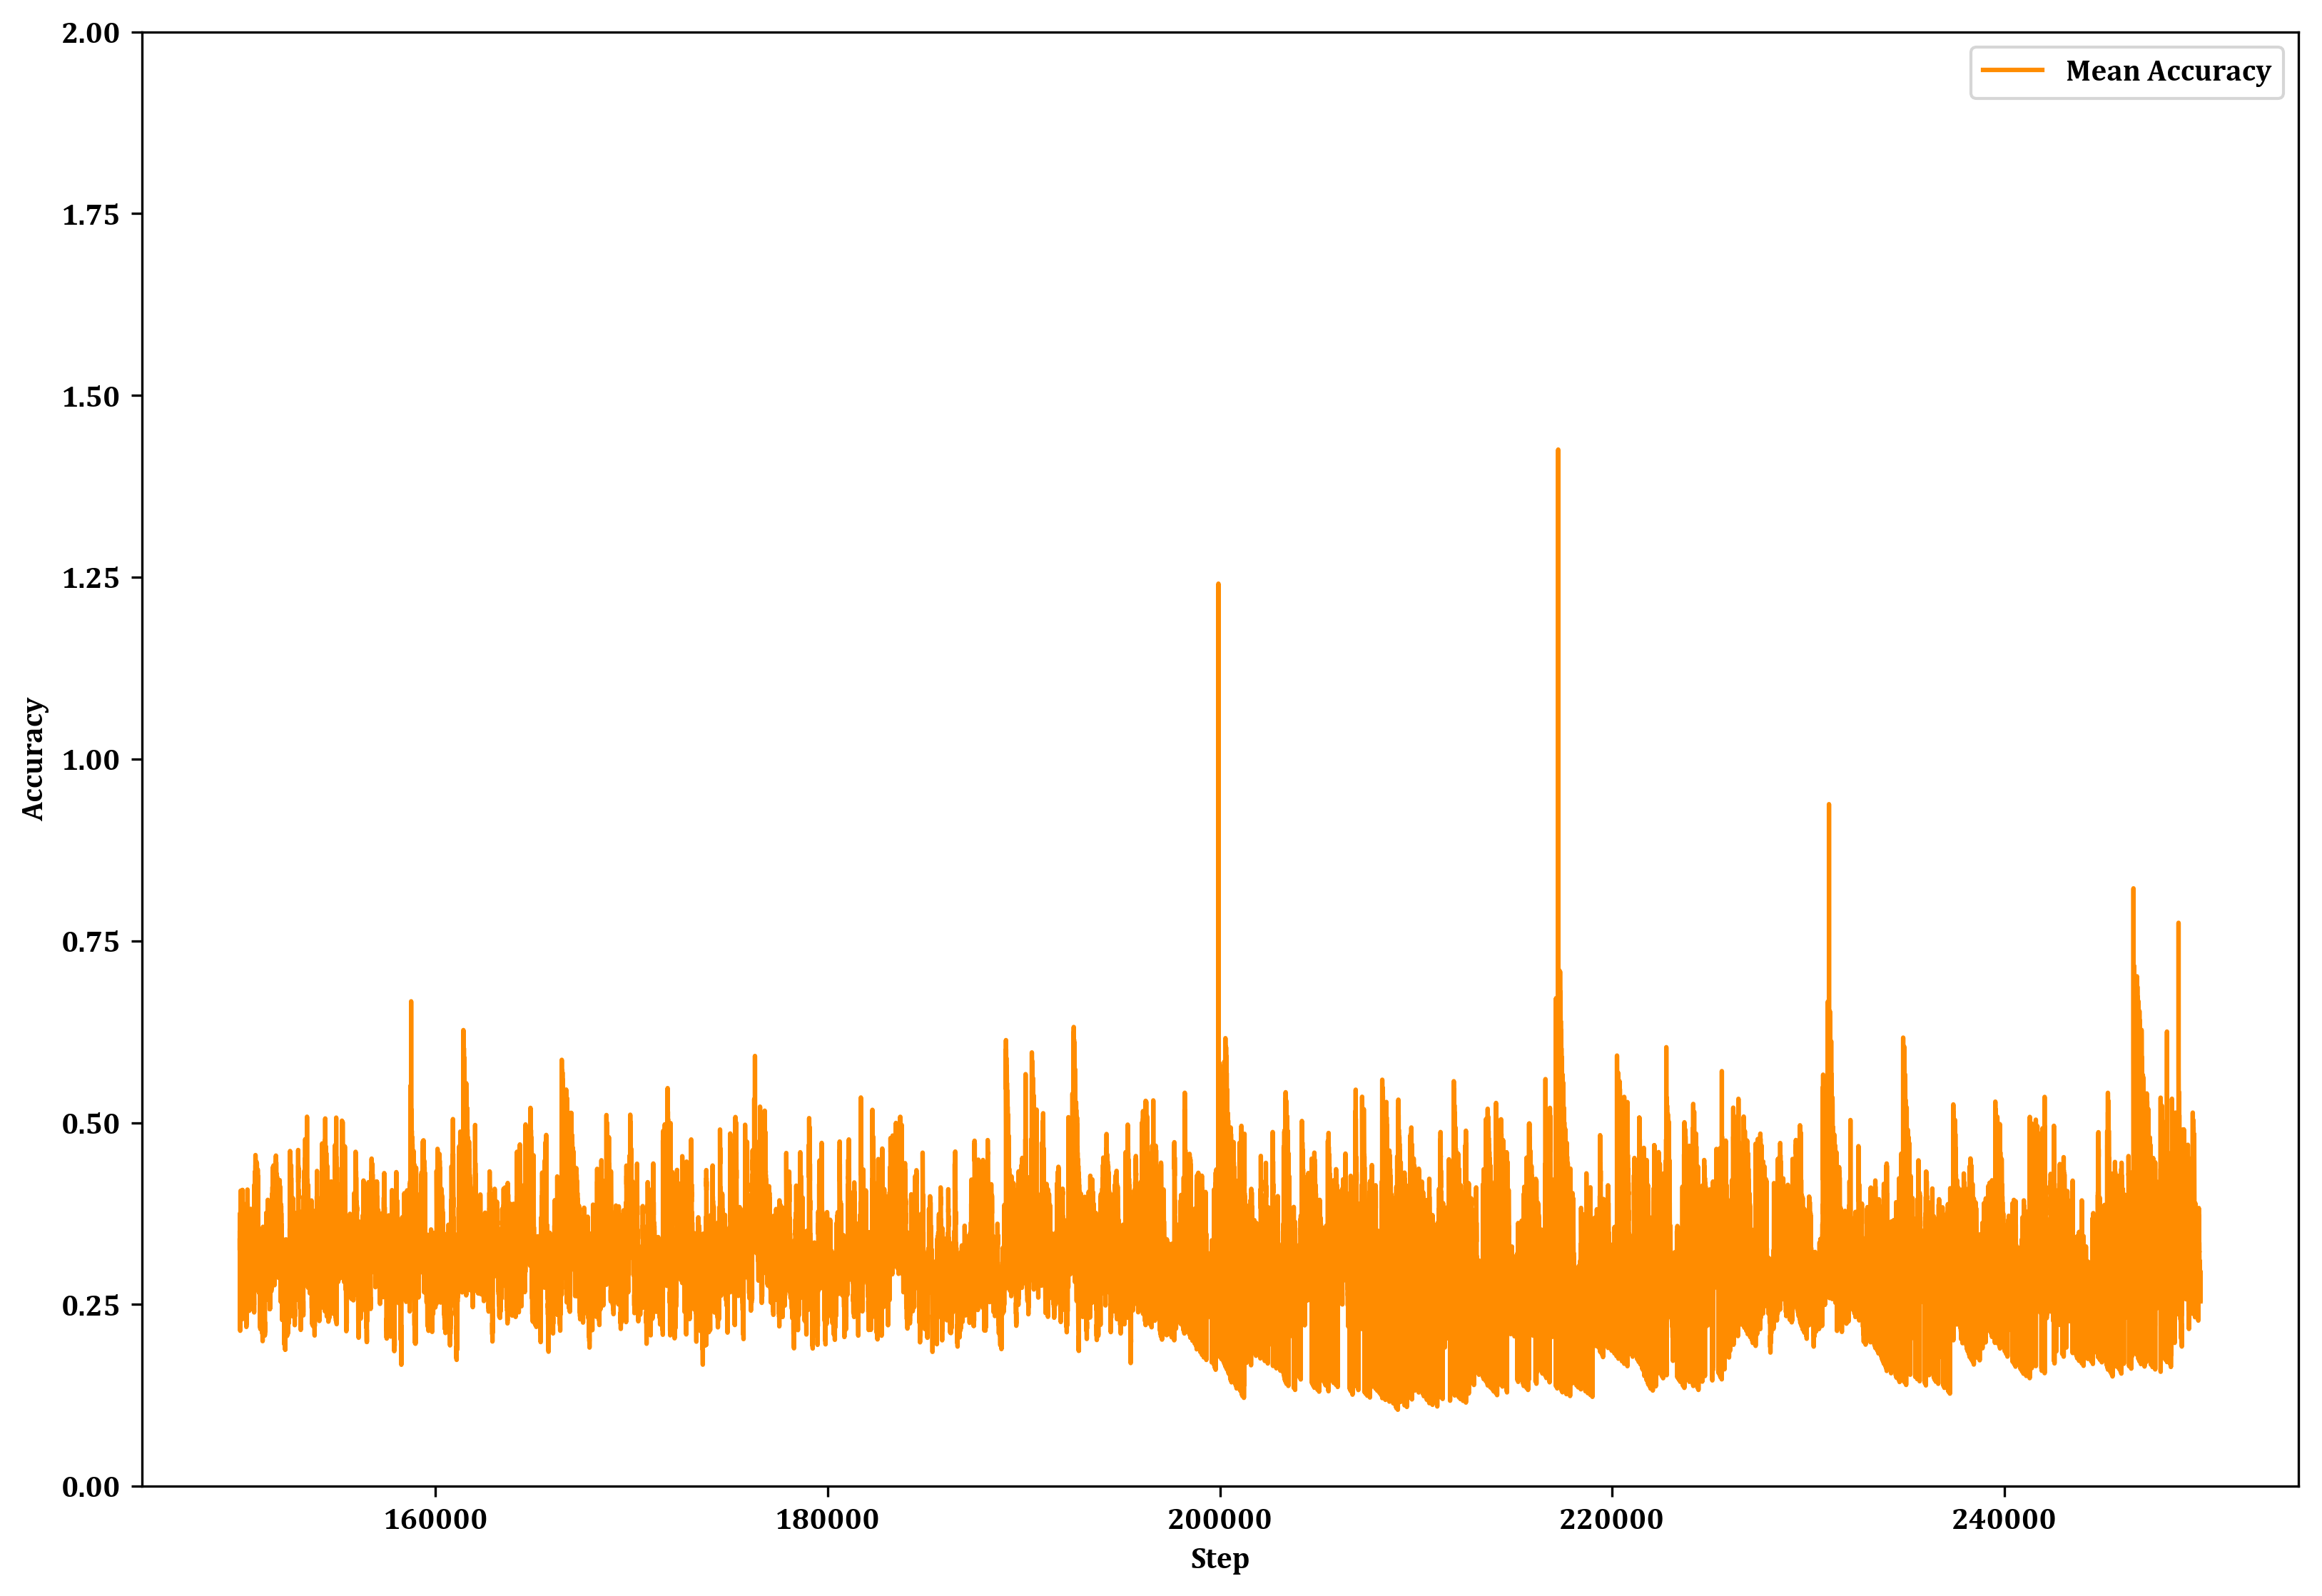

In [42]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(moi_df[150000:], linestyle='solid', color='DarkOrange', marker='None', label='Mean Accuracy')
ax1.set_ylim([0, 2])
ax1.set_xlabel('Step', family='Cambria')
ax1.set_ylabel('Accuracy', family='Cambria')
ax1.legend(loc='upper right')
plt.show()

In [44]:
toi_df = oi_df.groupby('OICond').OIStrat.count()
toi_df.sort_values()[-10:]

OICond
222222222220022212222222         3
222222212222222222222222         4
220222222022222222222222         4
222222222222222222202222         8
220012222222222222222222        10
222222222222222222221222      1083
222202222222222222222222     26140
222222220222202222222220     34683
222222222020222222122222     37225
222222222222222222222222    150897
Name: OIStrat, dtype: int64

In [46]:
toi2_df = oi_df.groupby('Step')['OIStrat', 'OIV'].mean()
toi2_df = toi2_df.assign(NailedIt = toi2_df.OIStrat == toi2_df.OIV,
                         Zed = toi2_df.OIV == 0)
toi2_df.groupby(['Zed', 'NailedIt']).OIV.count()

Zed    NailedIt
False  False        60672
       True             2
True   False          100
       True        189206
Name: OIV, dtype: int64